# Exploring EDF file and MNE library

This notebook is used to explore the EDF file and the MNE library.

## GPU setup

In [15]:
import mne
import pandas as pd

In [66]:
!nvidia-smi

Fri Aug 26 23:16:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   51C    P8     4W /  N/A |    309MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [84]:
print(mne.get_config('MNE_USE_CUDA'))
print(type(mne.get_config('MNE_USE_CUDA')))

true
<class 'str'>


In [76]:
print(mne.get_config('missing_config_key', default='fallback value'))

fallback value


In [77]:
mne.get_config(key=None)

{}

In [78]:
print(mne.get_config(key=''))

('MNE_3D_OPTION_ANTIALIAS', 'MNE_3D_OPTION_DEPTH_PEELING', 'MNE_3D_OPTION_MULTI_SAMPLES', 'MNE_3D_OPTION_SMOOTH_SHADING', 'MNE_3D_OPTION_THEME', 'MNE_BROWSE_RAW_SIZE', 'MNE_BROWSER_BACKEND', 'MNE_BROWSER_OVERVIEW_MODE', 'MNE_BROWSER_PRECOMPUTE', 'MNE_BROWSER_THEME', 'MNE_BROWSER_USE_OPENGL', 'MNE_CACHE_DIR', 'MNE_COREG_ADVANCED_RENDERING', 'MNE_COREG_COPY_ANNOT', 'MNE_COREG_FULLSCREEN', 'MNE_COREG_GUESS_MRI_SUBJECT', 'MNE_COREG_HEAD_HIGH_RES', 'MNE_COREG_HEAD_OPACITY', 'MNE_COREG_HEAD_INSIDE', 'MNE_COREG_INTERACTION', 'MNE_COREG_MARK_INSIDE', 'MNE_COREG_PREPARE_BEM', 'MNE_COREG_ORIENT_TO_SURFACE', 'MNE_COREG_SCALE_LABELS', 'MNE_COREG_SCALE_BY_DISTANCE', 'MNE_COREG_SCENE_SCALE', 'MNE_COREG_WINDOW_HEIGHT', 'MNE_COREG_WINDOW_WIDTH', 'MNE_COREG_SUBJECTS_DIR', 'MNE_CUDA_DEVICE', 'MNE_CUDA_IGNORE_PRECISION', 'MNE_DATA', 'MNE_DATASETS_BRAINSTORM_PATH', 'MNE_DATASETS_EEGBCI_PATH', 'MNE_DATASETS_EPILEPSY_ECOG_PATH', 'MNE_DATASETS_HF_SEF_PATH', 'MNE_DATASETS_MEGSIM_PATH', 'MNE_DATASETS_MISC_PATH

In [79]:
mne.set_config('MNEE_USE_CUUDAA', 'false')

/tmp/ipykernel_2506/2766955246.py:1: RuntimeWarning: Setting non-standard config type: "MNEE_USE_CUUDAA"
  mne.set_config('MNEE_USE_CUUDAA', 'false')


In [82]:
mne.set_config('MNEE_USE_CUUDAA', None)
assert 'MNEE_USE_CUUDAA' not in mne.get_config('')

/tmp/ipykernel_2506/1474772638.py:1: RuntimeWarning: Setting non-standard config type: "MNEE_USE_CUUDAA"
  mne.set_config('MNEE_USE_CUUDAA', None)


In [85]:
mne.set_config('MNE_USE_CUDA', 'true')

## Load data

In [5]:
file = "/mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb01/chb01_01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_2506/1235444766.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(file)


In [19]:
pd.DataFrame(raw_data.T, columns=channels)

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-1.459341e-04,-1.045177e-04,-4.278388e-05,-3.301587e-05,-1.709402e-04,-1.107692e-04,1.191697e-05,-5.645910e-05,-1.392918e-04,-1.367521e-06,...,5.724054e-05,4.473748e-05,7.482295e-05,-1.060806e-04,8.459096e-05,4.317460e-05,-5.724054e-05,-2.647131e-04,9.474969e-05,4.473748e-05
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07
3,1.953602e-07,5.860806e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.367521e-06,1.953602e-07,-2.148962e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,1.758242e-06,1.953602e-07,1.953602e-07
4,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,9.768010e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,-2.148962e-06,1.953602e-07,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.387057e-05,1.113553e-05,4.825397e-05,6.056166e-06,-7.619048e-06,7.228327e-06,3.887668e-05,4.200244e-05,-9.768010e-07,7.619048e-06,...,2.246642e-05,2.363858e-05,-1.699634e-05,1.660562e-05,1.113553e-05,-4.786325e-05,-4.278388e-05,3.223443e-05,1.113553e-05,2.363858e-05
921596,-1.758242e-06,2.129426e-05,5.411477e-05,-1.035409e-05,-2.520147e-05,2.324786e-05,4.981685e-05,1.426129e-05,-5.860806e-07,9.181929e-06,...,1.426129e-05,1.582418e-05,-3.145299e-05,2.871795e-05,1.855922e-05,-5.372405e-05,-2.793651e-05,3.184371e-05,9.768010e-07,1.582418e-05
921597,-1.152625e-05,2.363858e-05,4.864469e-05,-1.777778e-05,-3.496947e-05,3.809524e-05,4.004884e-05,9.768010e-07,-2.148962e-06,1.758242e-06,...,-2.539683e-06,1.699634e-05,-1.738706e-05,2.481074e-05,1.894994e-05,-4.825397e-05,-1.191697e-05,9.768010e-07,-7.228327e-06,1.699634e-05
921598,-2.930403e-06,2.754579e-05,4.512821e-05,-2.051282e-05,-2.598291e-05,4.864469e-05,3.379731e-05,-6.446886e-06,-2.148962e-06,2.930403e-06,...,-9.963370e-06,2.246642e-05,-1.758242e-06,2.871795e-05,2.051282e-05,-4.473748e-05,-3.711844e-06,-1.582418e-05,-1.035409e-05,2.246642e-05


Using matplotlib as 2D backend.


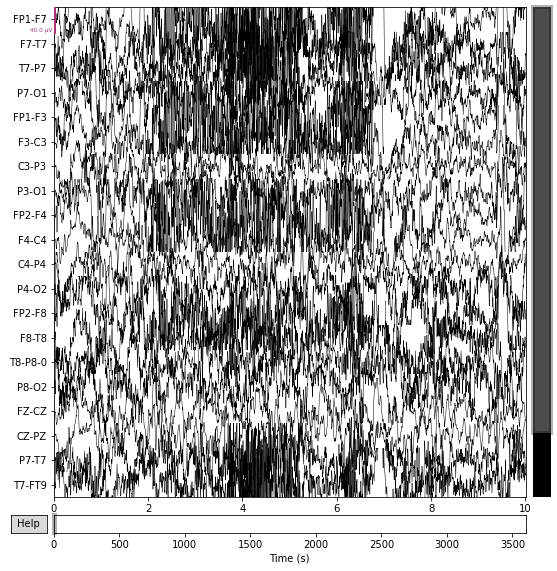

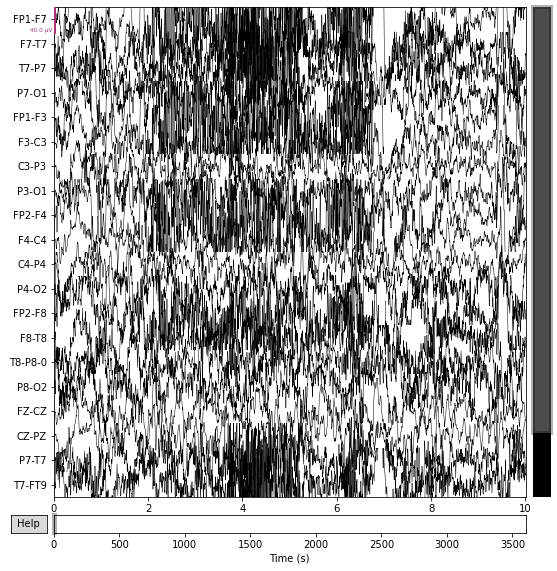

In [23]:
data.plot()

Effective window size : 8.000 (s)


/tmp/ipykernel_2506/300641692.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


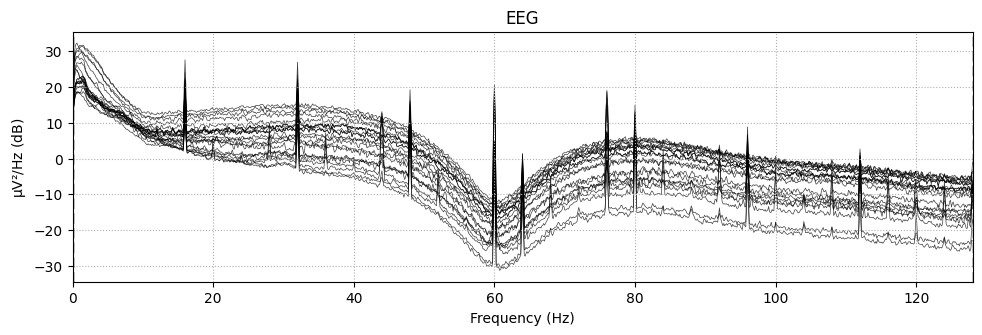

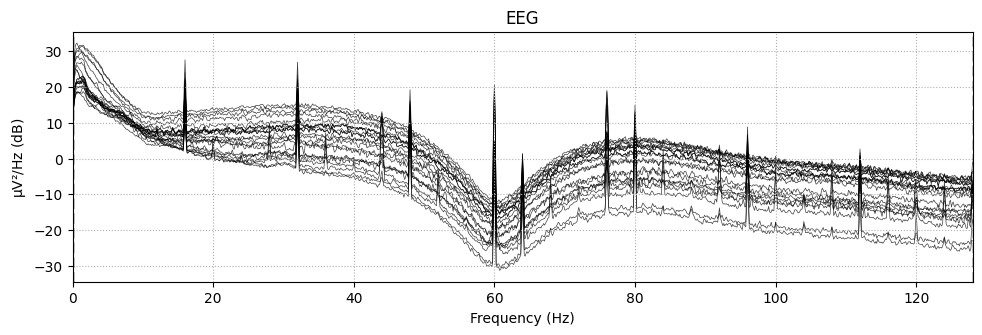

In [24]:
data.plot_psd()

In [32]:
df = data.to_data_frame()

In [58]:
print(type(data.info))
data.info

<class 'mne.io.meas_info.Info'>


<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>

In [33]:
df

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-145.934066,-104.517705,-42.783883,-33.015873,-170.940171,-110.769231,11.916972,-56.459096,-139.291819,...,57.240537,44.737485,74.822955,-106.080586,84.590965,43.174603,-57.240537,-264.713065,94.749695,44.737485
1,0.003906,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,0.195360,0.195360
3,0.011719,0.195360,0.586081,0.195360,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,...,1.367521,0.195360,-2.148962,0.195360,0.195360,0.195360,-0.586081,1.758242,0.195360,0.195360
4,0.015625,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.976801,0.195360,0.195360,0.195360,0.586081,-2.148962,0.195360,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,3599.980469,13.870574,11.135531,48.253968,6.056166,-7.619048,7.228327,38.876679,42.002442,-0.976801,...,22.466422,23.638584,-16.996337,16.605617,11.135531,-47.863248,-42.783883,32.234432,11.135531,23.638584
921596,3599.984375,-1.758242,21.294261,54.114774,-10.354090,-25.201465,23.247863,49.816850,14.261294,-0.586081,...,14.261294,15.824176,-31.452991,28.717949,18.559219,-53.724054,-27.936508,31.843712,0.976801,15.824176
921597,3599.988281,-11.526252,23.638584,48.644689,-17.777778,-34.969475,38.095238,40.048840,0.976801,-2.148962,...,-2.539683,16.996337,-17.387057,24.810745,18.949939,-48.253968,-11.916972,0.976801,-7.228327,16.996337
921598,3599.992188,-2.930403,27.545788,45.128205,-20.512821,-25.982906,48.644689,33.797314,-6.446886,-2.148962,...,-9.963370,22.466422,-1.758242,28.717949,20.512821,-44.737485,-3.711844,-15.824176,-10.354090,22.466422


<AxesSubplot:>

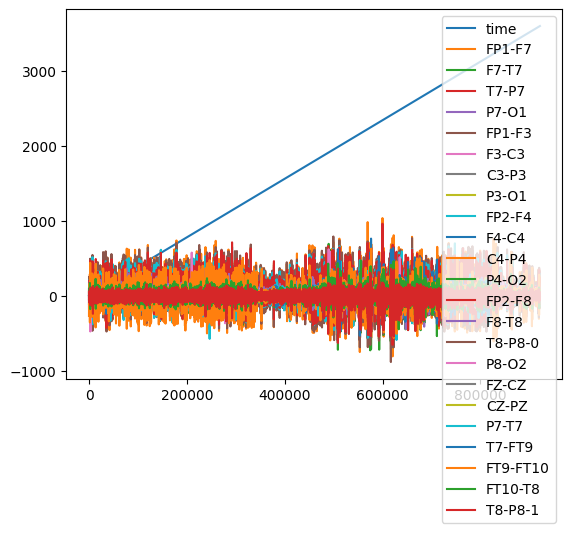

In [34]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

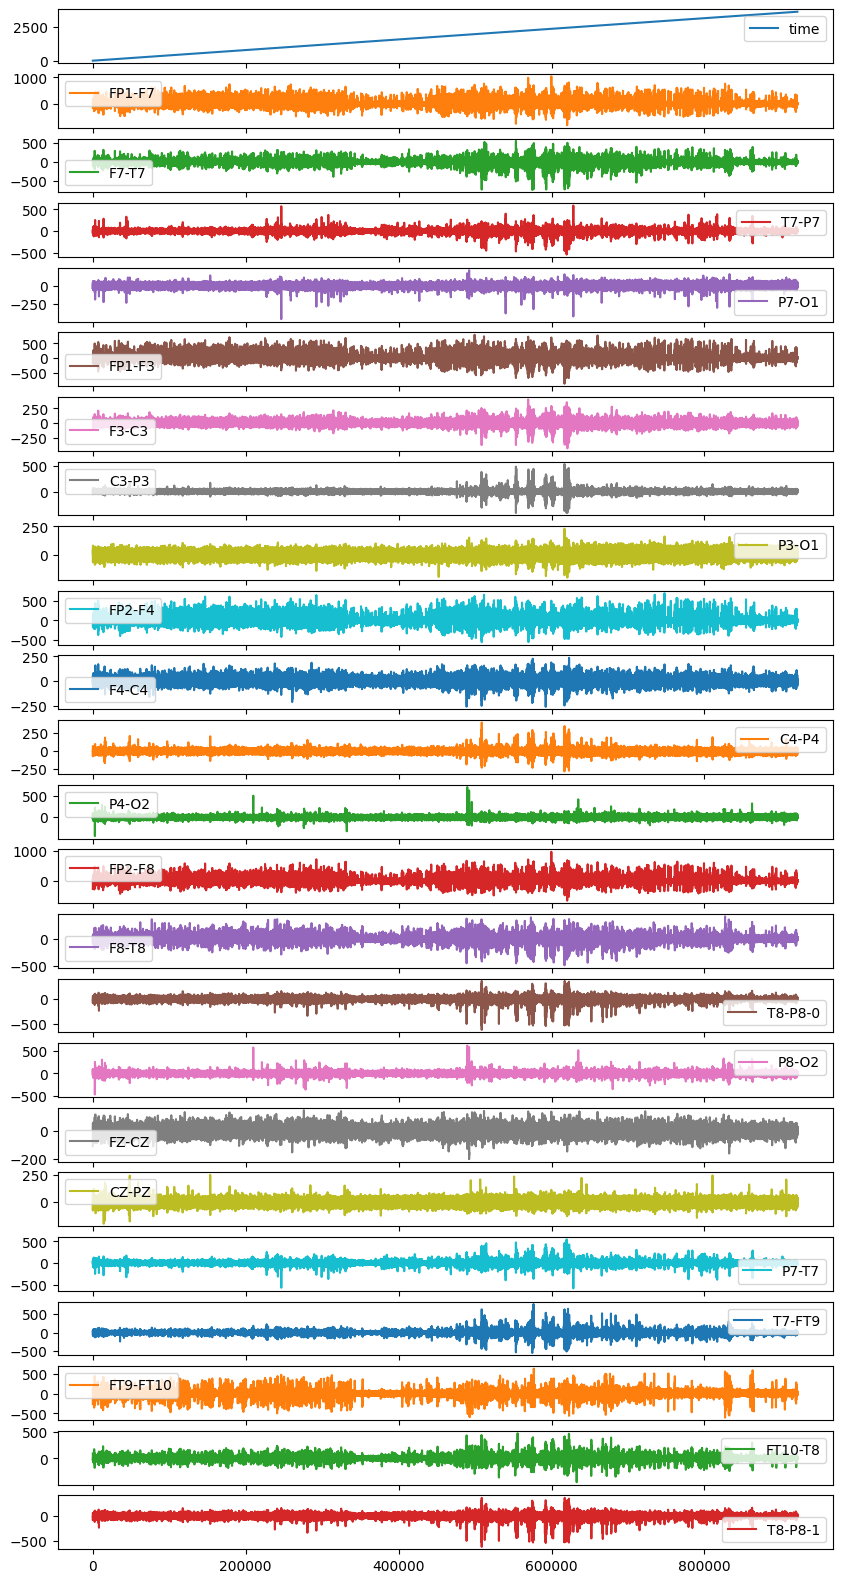

In [86]:
df.plot(subplots=True, figsize=(10, 20))

In [87]:
data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [88]:
for key in data.info.keys():
    print(key, data.info[key])

acq_pars None
acq_stim None
ctf_head_t None
description None
dev_ctf_t None
dig None
experimenter None
utc_offset None
device_info None
file_id None
highpass 0.0
hpi_subsystem None
kit_system_id None
helium_info None
line_freq None
lowpass 128.0
meas_date 2076-11-06 11:42:54+00:00
meas_id None
proj_id None
proj_name None
subject_info None
xplotter_layout None
gantry_angle None
bads []
chs [{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'FP1-F7', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 2, 'scanno': 2, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'F7-T7', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]